## Project -1 Salary Project

## Problem Statement
Predict the salary if the employee using the features provided in the data. 

In [201]:
# Lets  start with importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from scipy.stats import skew 
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer

# Examine Data

In [202]:
Salary=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
Salary

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


## Checking the Null value in the dataframe 

In [203]:
Salary.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [204]:
Salary.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

since there is no null value so we can proceed

## Checking data type of the columns

In [205]:
#print summary (number of obseravation and data type for each column in give data set)
print('Shape         ------>',Salary.shape)
print('Each column and data type and its count','\n')
print(Salary.info())

Shape         ------> (397, 6)
Each column and data type and its count 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB
None


# Manipulating Data

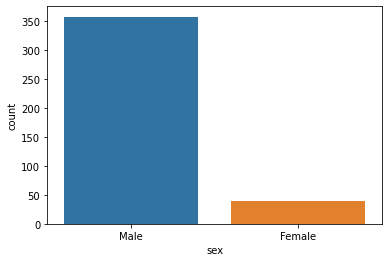

In [206]:
#plot each Sex frequency 

sns.countplot(x='sex',data=Salary)
plt.show()

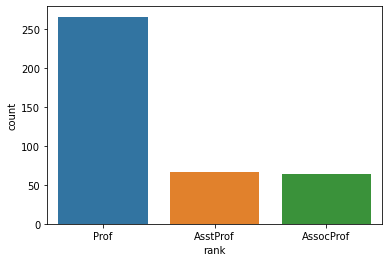

In [207]:
#plot each rank frequency 

sns.countplot(x='rank',data=Salary)
plt.show()

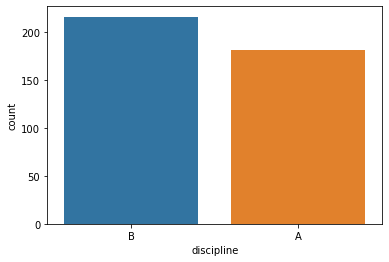

In [208]:
#plot each discipline frequency 

sns.countplot(x='discipline',data=Salary)
plt.show()

In [209]:
# replace label column (rank) into binary codes
# machine Model never ever understand object data type 

Salary['rank']= Salary['rank'].replace({'Prof':0,'AsstProf':1,'AssocProf':2})

In [210]:
# replace label column (sex) into binary codes
# machine Model never ever understand object data type 

Salary['sex']= Salary['sex'].replace({'Male':0,'Female':1})

In [211]:
# replace label column (discipline) into binary codes
# machine Model never ever understand object data type 

Salary['discipline']= Salary['discipline'].replace({'A':1,'B':0})

In [212]:
Salary

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,0,0,19,18,0,139750
1,0,0,20,16,0,173200
2,1,0,4,3,0,79750
3,0,0,45,39,0,115000
4,0,0,40,41,0,141500
...,...,...,...,...,...,...
392,0,1,33,30,0,103106
393,0,1,31,19,0,150564
394,0,1,42,25,0,101738
395,0,1,25,15,0,95329


In [213]:
#print summary (number of obseravation and data type for each column in give data set)
print('Shape         ------>',Salary.shape)
print('Each column and data type and its count','\n')
print(Salary.info())

Shape         ------> (397, 6)
Each column and data type and its count 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   rank           397 non-null    int64
 1   discipline     397 non-null    int64
 2   yrs.since.phd  397 non-null    int64
 3   yrs.service    397 non-null    int64
 4   sex            397 non-null    int64
 5   salary         397 non-null    int64
dtypes: int64(6)
memory usage: 18.7 KB
None


In [214]:
Salary.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,0.491184,0.455919,22.314861,17.614610,0.098237,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,0.000000,0.000000,12.000000,7.000000,0.000000,91000.000000
50%,0.000000,0.000000,21.000000,16.000000,0.000000,107300.000000
75%,1.000000,1.000000,32.000000,27.000000,0.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


In [215]:
Salary.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,0,0,19,18,0,139750
1,0,0,20,16,0,173200
2,1,0,4,3,0,79750
3,0,0,45,39,0,115000
4,0,0,40,41,0,141500


# Let's visualize the data and analyze

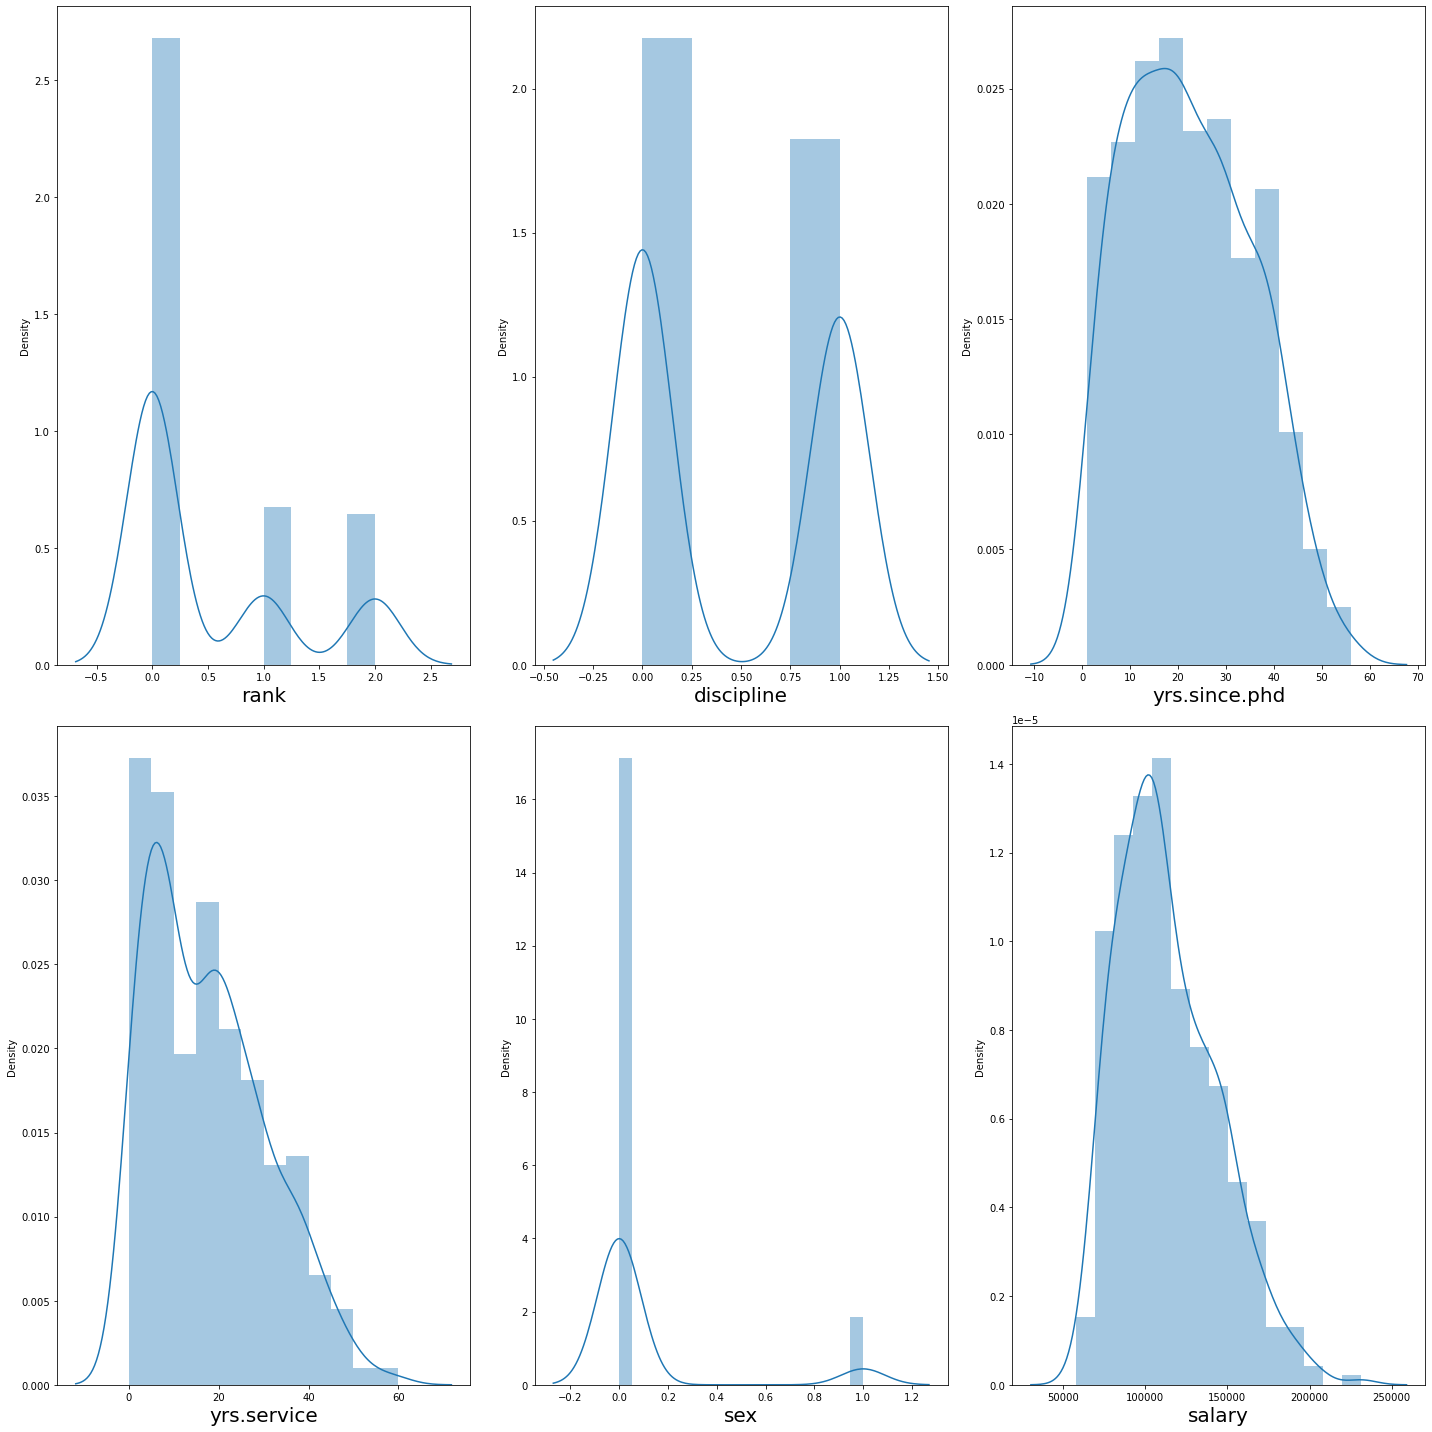

In [216]:
# let's see how data is distributed for every column

plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in Salary:
    if plotnumber<=8:
        ax= plt.subplot(2,3,plotnumber)
        sns.distplot(Salary[column])
        plt.xlabel(column,fontsize=20)
        
        
    plotnumber+=1
plt.tight_layout()

## Plotting Heatmap (correlation matrix )
lets try to see if we can reduce the feature using different techniques
lets plot heatmap to visualize and find the coeffcient of multicollinarity

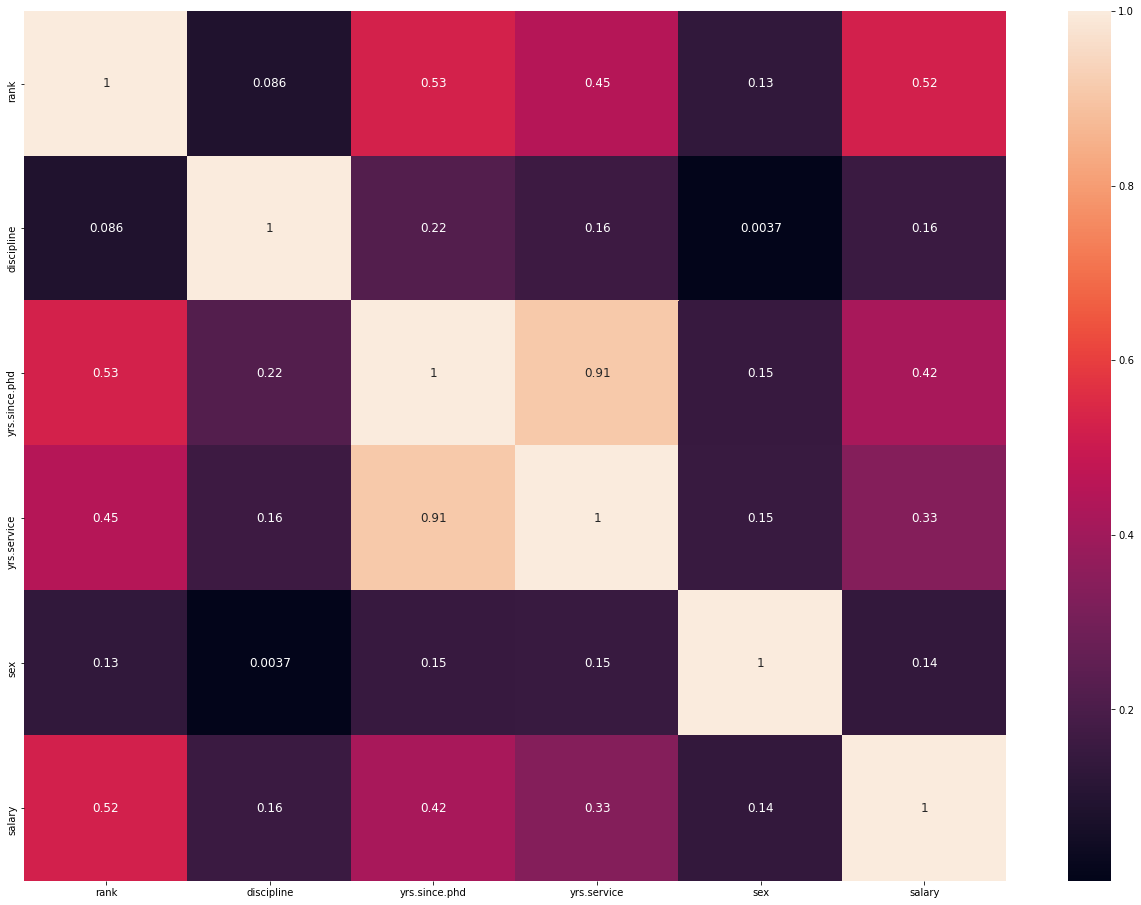

In [217]:
df_corr = Salary.corr().abs() #Corr method  =co-realation co-efficient ,# abs =Absolute nuumer 

# this code will get the coefficient of one variable vs all other variable (relationship)
# annot= true (used to display number) 
#aanot_KWs =size of number 

plt.figure(figsize=(22,16))
sns.heatmap(df_corr,annot=True,annot_kws={'size':12}) 
plt.show()


# The value lies between -1 to 1 (-1 Negatively correlation ) & (+1 Positively correlation )

1.146809479700352
0.17701166263503454
0.29974153157458827
0.6481088240680349
2.6997084522172408
0.7118657337591157


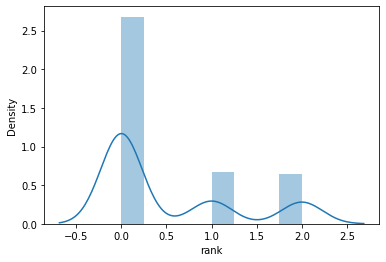

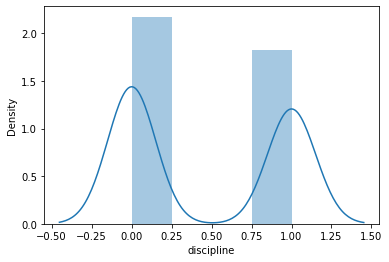

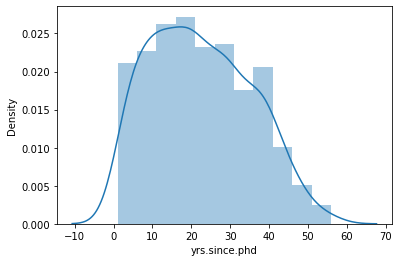

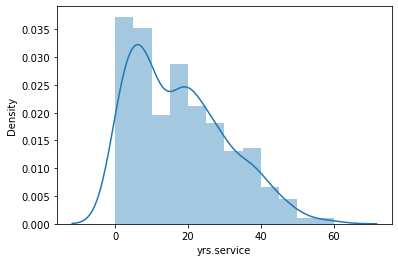

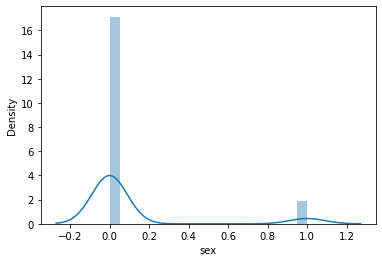

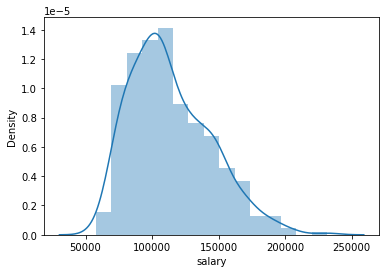

In [218]:
for col in Salary:
    print(skew(Salary[col]))
    plt.figure()
    sns.distplot(Salary[col])
    plt.show

In [219]:
Salary.skew()

rank             1.151164
discipline       0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex              2.709958
salary           0.714568
dtype: float64

In [220]:
Salary["rank"]=np.sqrt(Salary["rank"])
Salary.skew()

rank             0.858958
discipline       0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex              2.709958
salary           0.714568
dtype: float64

The data distribution looks decent enough and there doesn't seem to be any skewness. Great let's go ahead! 

In [221]:
Salary.shape

(397, 6)

In [222]:
Salary

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,0.0,0,19,18,0,139750
1,0.0,0,20,16,0,173200
2,1.0,0,4,3,0,79750
3,0.0,0,45,39,0,115000
4,0.0,0,40,41,0,141500
...,...,...,...,...,...,...
392,0.0,1,33,30,0,103106
393,0.0,1,31,19,0,150564
394,0.0,1,42,25,0,101738
395,0.0,1,25,15,0,95329


# Preparing Data for Machine Learning

Now we will choose x and y axis and split these datas to train or test.

In [223]:
X =Salary.drop(columns=['salary'])
y=Salary['salary']

In [224]:
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

In [225]:
X

,rank,discipline,yrs.since.phd,yrs.service,sex
0,0.0,0,19,18,0
1,0.0,0,20,16,0
2,1.0,0,4,3,0
3,0.0,0,45,39,0
4,0.0,0,40,41,0
...,...,...,...,...,...
392,0.0,1,33,30,0
393,0.0,1,31,19,0
394,0.0,1,42,25,0
395,0.0,1,25,15,0


## Let's observe the relationship between independent variables and dependent variable.

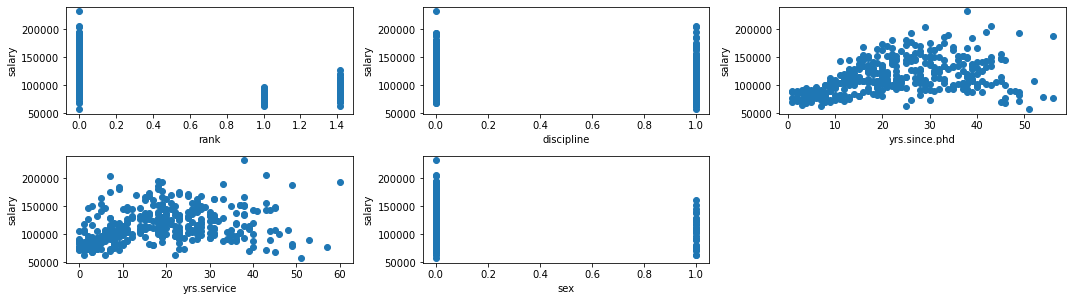

In [226]:
# Visualizing relationship

plt.figure(figsize=(15,8),facecolor='white')
plotnumber=1

for column in X:
    if plotnumber<=12:
        ax= plt.subplot(4,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('salary',fontsize=10)      
        
    plotnumber+=1
plt.tight_layout()

In [227]:
# Data Scaling. Formula Z = (X - mean)/std

scaler = StandardScaler()

X_scaled= scaler.fit_transform(X)

In [228]:
# Split data into train and test. Model will be built on training data and tested on test data.

#it has to be in order 

# featue is X_scaled,y label,test_size =0.25 (defualt value of 25% testing)

# random_state=50 (used pick up data randomly from the data set 

x_train,x_test,y_train,y_test= train_test_split(X_scaled,y,test_size=0.25, random_state=50)
y_train.head()

319    135027
159    137167
161    176500
338    128464
107     82600
Name: salary, dtype: int64

## Model instantiating and training

In [229]:
regression = LinearRegression()

regression.fit(x_train, y_train )

LinearRegression()

## Predict the chance of admission given features

In [230]:
Salary.tail(2)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
395,0.0,1,25,15,0,95329
396,1.0,1,8,4,0,81035


In [232]:
#since we have already fit the scaler ,you can transfer the data 

# Predict is method used to predict chance of admission 
# Scaler is method convert data into scaled data Then transform 

print ('Salary Prediction:',regression.predict(scaler.transform([[1,1,8,4,0]])))

Salary Prediction: [84731.45607784]


## You can save the model and later you can use it for prediction 

In [233]:
# saving the model to the local file system 
# dump is method to save the model 
# Wb = Write 

import pickle

filename = 'finalized_model.pickle'

pickle.dump(regression, open (filename,'wb')) 



In [234]:
# Adjusted R2 score
# score is adjusted score (here we understand how well model got trained)

regression.score(x_train, y_train)

0.42064192887622753

In [235]:
## Let's check how well model fits the test data.

In [236]:
regression.score(x_test,y_test)

0.352013848077651

In [237]:
## Lasso Regularization

In [244]:
lasscv=LassoCV(alphas=None,max_iter=300,normalize=True)
lasscv.fit(x_train,y_train)
alpha=lasscv.alpha_
alpha

65.11830497714494

In [239]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_test,y_test)

0.35120319648479337

## Let's plot and visualize 

In [242]:
# here we predict for all X_test data 

y_pred= regression.predict(x_test)
y_pred

array([119831.83245349,  91449.09062953, 127024.55652624, 135746.52396806,
        99223.9584289 , 118440.96920789, 132368.88020238,  99414.45182503,
       113692.63215509, 126984.76465669,  95587.94153482, 116215.71149419,
       133760.01747168, 114030.24565004,  98500.47361782,  92727.24870078,
       124361.93162   , 118878.06237672, 113712.52808987, 128792.82513634,
       124560.27357151, 137216.97095277,  82874.24328653,  99414.45182503,
       121123.2160252 , 114089.93345437, 146078.20993803,  88197.14953427,
       134772.85795652, 110734.2551645 , 137077.69940933, 118641.72407299,
       132607.28804714, 137435.20883905, 136561.02250139, 127839.05505957,
        77527.57604565,  76785.99081712, 140773.40410774,  96275.21590411,
       134514.82820068, 140376.10280846, 135269.63892968, 116692.59653257,
        94944.04046285, 119275.363676  , 127580.13388376,  90262.96574605,
        81632.01202648, 122792.00496141, 130004.62496894,  90859.5004168 ,
       122354.91179258, 1

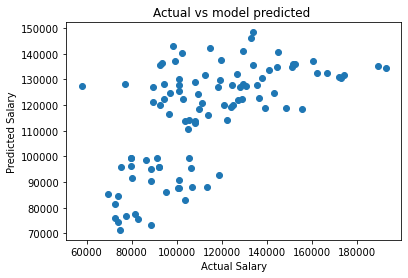

In [243]:
#Now we compare with actual vs predict 
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs model predicted ')
plt.show()

## Conclusion

 data set is implance for sex, rank , descipline feature so our model accuracy is very less